In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import statsmodels.api as sm
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.figure_factory import create_gantt



In [2]:
data_path = "data"

file_Conduvibilita = "TBaia_01m-Conducibilita.txt"
file_CTD = "TBaia_01m-CTD.txt"
file_Ossigeno = "TBaia_01m-Ossigeno.txt"
file_Winkler = "TBaia_01m-Winkler.txt"

### Load Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 1 to 7399
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      7399 non-null   object        
 1   Ora(UTC)                  7399 non-null   object        
 2   Profondita'(m)            7399 non-null   float32       
 3   Pressione(db)             7399 non-null   float32       
 4   Conducibilita'(mS/cm)     7399 non-null   float32       
 5   Temperatura(°C)           7399 non-null   float32       
 6   Tensione_Batteria(V)      7399 non-null   float32       
 7   Salinita'(PSU)            7399 non-null   float32       
 8   Densita'(Kg/m^3)          7399 non-null   float32       
 9   Densita'(Kg/m^3-1000)     7399 non-null   float32       
 10  Velocita'_del_Suono(m/s)  7399 non-null   float32       
 11  Time                      7399 non-null   datetime64[ns]
dtypes: datetime64[ns](1)

,Profondita'(m),Ossigeno(mg/l),Ossigeno(ml/l),Ossigeno(umol/l),Ossigeno(%)
count,19.0,19.000000,19.000000,19.000000,19.000000
mean,1.0,7.924738,5.551053,247.684204,95.121643
std,0.0,0.409490,0.286490,12.931667,3.164390
min,1.0,7.120000,4.990000,222.000000,89.357002
25%,1.0,7.635000,5.350000,238.500000,92.865002
50%,1.0,8.000000,5.600000,250.000000,95.332001
75%,1.0,8.220000,5.760000,257.000000,97.359001
max,1.0,8.530000,5.980000,267.000000,102.495003


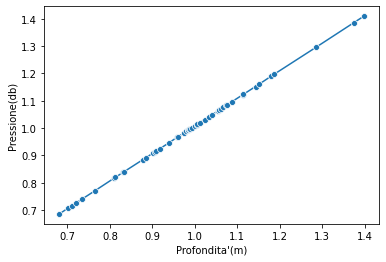

In [3]:
def convertTime(x):
    try:
        return pd.to_datetime(x["Data"] + "/" + x["Ora(UTC)"], format="%d/%m/%Y/%H:%M:%S")
    except:
        return -1

################### Conducibilita ###################
Conducibilita_raw_df = pd.read_csv(os.path.join(data_path, file_Conduvibilita), encoding='cp1252', header=None, skiprows=11)
Conducibilita_raw_df.iloc[0, 0] = re.sub("#", "", Conducibilita_raw_df.iloc[0, 0]).strip()
Conducibilita_raw_df = Conducibilita_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = Conducibilita_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = Conducibilita_raw_df.iloc[0, :]

Conducibilita_raw_df.columns = colNames
Conducibilita_raw_df = Conducibilita_raw_df.iloc[1:, :]

for j in range(2, Conducibilita_raw_df.shape[1]):
    Conducibilita_raw_df.iloc[:, j] = Conducibilita_raw_df.iloc[:, j].astype(np.float32)

Conducibilita_raw_df["Time"] = Conducibilita_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Conducibilita_raw_df["Data"] = Conducibilita_raw_df["Time"].dt.date
Conducibilita_raw_df["Ora(UTC)"] =  Conducibilita_raw_df["Time"].dt.time

Conducibilita_raw_df.info()
Conducibilita_raw_df.describe()

################### CTD ###################

CTD_raw_df = pd.read_csv(os.path.join(data_path, file_CTD), encoding='cp1252', header=None, skiprows=15)
CTD_raw_df.iloc[0, 0] = re.sub("#", "", CTD_raw_df.iloc[0, 0]).strip()
CTD_raw_df = CTD_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = CTD_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = CTD_raw_df.iloc[0, :]

CTD_raw_df.columns = colNames
CTD_raw_df = CTD_raw_df.iloc[1:, :]

for j in range(2, CTD_raw_df.shape[1]):
    CTD_raw_df.iloc[:, j] = CTD_raw_df.iloc[:, j].astype(np.float32)

CTD_raw_df["Time"] = CTD_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
CTD_raw_df["Data"] = CTD_raw_df["Time"].dt.date
CTD_raw_df["Ora(UTC)"] =  CTD_raw_df["Time"].dt.time

CTD_raw_df.info()
CTD_raw_df.describe()

sns.lineplot(data=CTD_raw_df, x="Profondita'(m)", y="Pressione(db)", marker="o")

sm.OLS(CTD_raw_df["Conducibilita'(mS/cm)"], CTD_raw_df[["Pressione(db)", "Salinita'(PSU)", "Temperatura(°C)"]]).fit().summary()
sm.OLS(CTD_raw_df["Conducibilita'(mS/cm)"], CTD_raw_df[["Salinita'(PSU)", "Temperatura(°C)"]]).fit().summary()

################### Ossigeno ###################
Ossigeno_raw_df = pd.read_csv(os.path.join(data_path, file_Ossigeno), encoding='cp1252', header=None, skiprows=11)
Ossigeno_raw_df.iloc[0, 0] = re.sub("#", "", Ossigeno_raw_df.iloc[0, 0]).strip()
Ossigeno_raw_df = Ossigeno_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
# colNames = Ossigeno_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])
colNames = Ossigeno_raw_df.iloc[0, :]

Ossigeno_raw_df.columns = colNames
Ossigeno_raw_df = Ossigeno_raw_df.iloc[1:, :]

for j in range(2, Ossigeno_raw_df.shape[1]):
    Ossigeno_raw_df.iloc[:, j] = Ossigeno_raw_df.iloc[:, j].astype(np.float32)

Ossigeno_raw_df["Time"] = Ossigeno_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Ossigeno_raw_df["Data"] = Ossigeno_raw_df["Time"].dt.date
Ossigeno_raw_df["Ora(UTC)"] =  Ossigeno_raw_df["Time"].dt.time

Ossigeno_raw_df.info()
Ossigeno_raw_df.describe()

################### Winkler ###################
Winkler_raw_df = pd.read_csv(os.path.join(data_path, file_Winkler), encoding='cp1252', header=None, skiprows=10)
Winkler_raw_df.iloc[0, 0] = re.sub("#", "", Winkler_raw_df .iloc[0, 0]).strip()
Winkler_raw_df = Winkler_raw_df.squeeze().str.strip().apply(lambda x: re.sub("\s+", ",", x)).str.split(",", expand=True)
colNames = Winkler_raw_df.iloc[0, :]
# colNames = Winkler_raw_df.iloc[0, :].apply(lambda x: re.split(r"[(\\)\'_]", x)[0])

Winkler_raw_df.columns = colNames
Winkler_raw_df = Winkler_raw_df.iloc[1:, :]

for j in range(2,  Winkler_raw_df.shape[1]):
    Winkler_raw_df.iloc[:, j] = Winkler_raw_df.iloc[:, j].astype(np.float32)

Winkler_raw_df["Time"] = Winkler_raw_df[["Data", "Ora(UTC)"]].apply(lambda x: convertTime(x), axis=1)
Winkler_raw_df["Data"] = Winkler_raw_df["Time"].dt.date
Winkler_raw_df["Ora(UTC)"] =  Winkler_raw_df["Time"].dt.time

Winkler_raw_df.info()
Winkler_raw_df.describe()

### Join Data

In [ ]:
################### Join ###################
CTD_raw_df.columns = map(lambda x: x+"_CTD", CTD_raw_df.columns)
Winkler_raw_df.columns = map(lambda x: x+"_Winkler", Winkler_raw_df.columns)
Ossigeno_raw_df.columns = map(lambda x: x+"_Ossigeno", Ossigeno_raw_df.columns)
Conducibilita_raw_df.columns = map(lambda x: x+"_Conducibilita", Conducibilita_raw_df.columns)

joint_avg_df = (CTD_raw_df.merge(Conducibilita_raw_df, how="left", left_on="Data_CTD", right_on="Data_Conducibilita").groupby("Data_CTD").mean().reset_index()
           .merge(Ossigeno_raw_df, how="left", left_on="Data_CTD", right_on="Data_Ossigeno").groupby("Data_CTD").mean().reset_index()
           .merge(Winkler_raw_df, how="left", left_on="Data_CTD", right_on="Data_Winkler").groupby("Data_CTD").mean())

def merge_minDiff(CTD_raw_df, incoming):
    incoming_df = eval(incoming+"_raw_df")
    temp_df = CTD_raw_df.merge(incoming_df, how="left", left_on="Data_CTD", right_on="Data_" + incoming)
    temp_df["Time_diff"] = (temp_df["Time_CTD"] - temp_df["Time_" + incoming]).abs()
    temp2_df = temp_df.groupby("Data_CTD")["Time_diff"].min().reset_index()
    temp3_df = temp_df.merge(temp2_df, how="right", on=["Data_CTD", "Time_diff"])

    return temp3_df
    
incomings_ls = ["Conducibilita", "Ossigeno", "Winkler"]
joint_min_df = CTD_raw_df

for incoming in incomings_ls:
    joint_min_df = merge_minDiff(joint_min_df, incoming)


In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(CTD_raw_df["Data_CTD"])
plt.xticks(rotation=90)

sns.scatterplot(CTD_raw_df["Data_CTD"].value_counts().index, CTD_raw_df["Data_CTD"].value_counts()).set(title="CTD Sample Rate", xlabel="date", ylabel= "sample_counts")


plt.figure(figsize=(15,8))
sns.countplot(Winkler_raw_df["Data_Winkler"])
plt.xticks(rotation=90)

sns.scatterplot(Winkler_raw_df["Data_Winkler"].value_counts().index, Winkler_raw_df["Data_Winkler"].value_counts()).set(title="Winkler Sample Rate", xlabel="date", ylabel= "sample_counts")


plt.figure(figsize=(50,30))
sns.countplot(Ossigeno_raw_df["Data_Ossigeno"])
plt.xticks(rotation=90)

sns.scatterplot(Ossigeno_raw_df["Data_Ossigeno"].value_counts().index, Ossigeno_raw_df["Data_Ossigeno"].value_counts()).set(title="Ossigeno Sample Rate", xlabel="date", ylabel= "sample_counts")


plt.figure(figsize=(50,30))
sns.countplot(Conducibilita_raw_df["Data_Conducibilita"])
plt.xticks(rotation=90)

sns.scatterplot(Conducibilita_raw_df["Data_Conducibilita"].value_counts().index, Conducibilita_raw_df["Data_Conducibilita"].value_counts()).set(xlabel="date", ylabel= "sample_counts")

df = [dict(Task="CTD", Start=CTD_raw_df["Data_CTD"].min().strftime(format="%Y-%m-%d"), Finish=CTD_raw_df["Data_CTD"].max().strftime(format="%Y-%m-%d")),
      dict(Task="Winkler", Start=Winkler_raw_df["Data_Winkler"].min().strftime(format="%Y-%m-%d"), Finish=Winkler_raw_df["Data_Winkler"].max().strftime(format="%Y-%m-%d")),
      dict(Task="Ossigeno", Start=Ossigeno_raw_df["Data_Ossigeno"].min().strftime(format="%Y-%m-%d"), Finish=Ossigeno_raw_df["Data_Ossigeno"].max().strftime(format="%Y-%m-%d")),
      dict(Task="Conducibilita", Start=Conducibilita_raw_df["Data_Conducibilita"].min().strftime(format="%Y-%m-%d"), Finish=Conducibilita_raw_df["Data_Conducibilita"].max().strftime(format="%Y-%m-%d"))]
fig = create_gantt(df)
fig.show()

np.sort(joint_avg_df.columns)

compare_ls = []
sns.lineplot(joint_avg_df.index, joint_avg_df["Conducibilita'(mS/cm)_CTD"] - joint_avg_df["Conducibilita'(mS/cm)_Conducibilita"]).set(ylabel="Diff Conducibilita", title="CTD - Conducibilita by average")

sns.lineplot(joint_avg_df.index, joint_avg_df["Conducibilita'(mS/cm)_CTD"] - joint_avg_df["Conducibilita'(mS/cm)_Conducibilita"]).set(ylabel="Diff Conducibilita", title="CTD - Conducibilita by average")